# EDA

## More data preparation

### Load libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('bmh')

### Load DataFrame and first glance

In [32]:
# Load DataFram and glance:

df = pd.read_csv('df.csv')
df.head()

,Unnamed: 0,CRASH_DATE,DAMAGE,ZIPCODE,SEX,AGE,MAKE,MODEL,VEHICLE_YEAR
0,0,09/05/2018 08:40:00 AM,"OVER $1,500",60634,F,39,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002
1,1,09/05/2018 08:40:00 AM,"OVER $1,500",60634,F,39,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014
2,2,09/05/2018 08:40:00 AM,"OVER $1,500",60625,M,32,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002
3,3,09/05/2018 08:40:00 AM,"OVER $1,500",60625,M,32,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014
4,4,08/29/2022 11:30:00 AM,"$501 - $1,500",60620,F,40,NISSAN,ALTIMA,2017


In [33]:
# Drop un-needed column:
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918968 entries, 0 to 918967
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CRASH_DATE    918968 non-null  object
 1   DAMAGE        918968 non-null  object
 2   ZIPCODE       918968 non-null  object
 3   SEX           918968 non-null  object
 4   AGE           918968 non-null  int64 
 5   MAKE          918968 non-null  object
 6   MODEL         918968 non-null  object
 7   VEHICLE_YEAR  918968 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 56.1+ MB


### Inspect each column

#### 1. CRASH_DATE
Select date range from 06/01/2021 to 12/31/2021 to reduce the data size.

In [34]:
# Check the date range:
df['CRASH_DATE'].min(), df['CRASH_DATE'].max()

('01/01/2020 01:00:00 AM', '12/31/2021 12:50:00 AM')

In [35]:
# Select date range starting from 06/01/2021 for smaller data size:
df = df[df['CRASH_DATE'] >= '06/01/2021']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573816 entries, 0 to 918967
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CRASH_DATE    573816 non-null  object
 1   DAMAGE        573816 non-null  object
 2   ZIPCODE       573816 non-null  object
 3   SEX           573816 non-null  object
 4   AGE           573816 non-null  int64 
 5   MAKE          573816 non-null  object
 6   MODEL         573816 non-null  object
 7   VEHICLE_YEAR  573816 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 39.4+ MB


#### 2. DAMAGE
Convert the dtype to 'category' for smaller data size

In [36]:
df['DAMAGE'].value_counts(normalize=True)

OVER $1,500      0.633084
$501 - $1,500    0.280464
$500 OR LESS     0.086451
Name: DAMAGE, dtype: float64

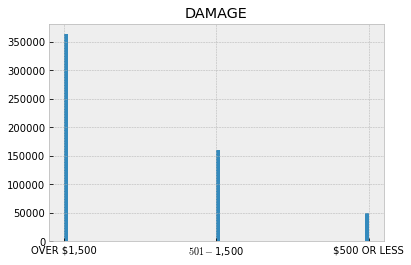

In [37]:
df['DAMAGE'].hist(bins='auto')
plt.title('DAMAGE')
plt.show();

In [38]:
df.memory_usage(deep=True)

Index            4590528
CRASH_DATE      45331464
DAMAGE          40134221
ZIPCODE         35578965
SEX             35576592
AGE              4590528
MAKE            37578457
MODEL           37538932
VEHICLE_YEAR     4590528
dtype: int64

In [39]:
df['DAMAGE']= df['DAMAGE'].astype('category')

In [40]:
df.memory_usage(deep=True)

Index            4590528
CRASH_DATE      45331464
DAMAGE            574127
ZIPCODE         35578965
SEX             35576592
AGE              4590528
MAKE            37578457
MODEL           37538932
VEHICLE_YEAR     4590528
dtype: int64

#### 3. ZIPCODE

Trim the long tails and outliers: drop 'ZIPCODE' if its value_counts is less than 600.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573816 entries, 0 to 918967
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   CRASH_DATE    573816 non-null  object  
 1   DAMAGE        573816 non-null  category
 2   ZIPCODE       573816 non-null  object  
 3   SEX           573816 non-null  object  
 4   AGE           573816 non-null  int64   
 5   MAKE          573816 non-null  object  
 6   MODEL         573816 non-null  object  
 7   VEHICLE_YEAR  573816 non-null  int64   
dtypes: category(1), int64(2), object(5)
memory usage: 35.6+ MB


In [42]:
zipcode_count = df['ZIPCODE'].value_counts()
zipcode_count

60629    22743
60639    18336
60632    15406
60620    14722
60617    14648
         ...  
10122        1
80603        1
48193        1
38664        1
01832        1
Name: ZIPCODE, Length: 7181, dtype: int64

In [43]:
zipcod_dict = zipcode_count.to_dict()

zipcode_drop_list= []

for k in zipcod_dict:
    if zipcod_dict[k] < 600:
        zipcode_drop_list.append(k)

df = df[df.ZIPCODE.isin(zipcode_drop_list) == False]

In [44]:
df['ZIPCODE'].value_counts()

60629    22743
60639    18336
60632    15406
60620    14722
60617    14648
         ...  
60471      653
60091      637
60527      637
60085      619
60090      613
Name: ZIPCODE, Length: 115, dtype: int64

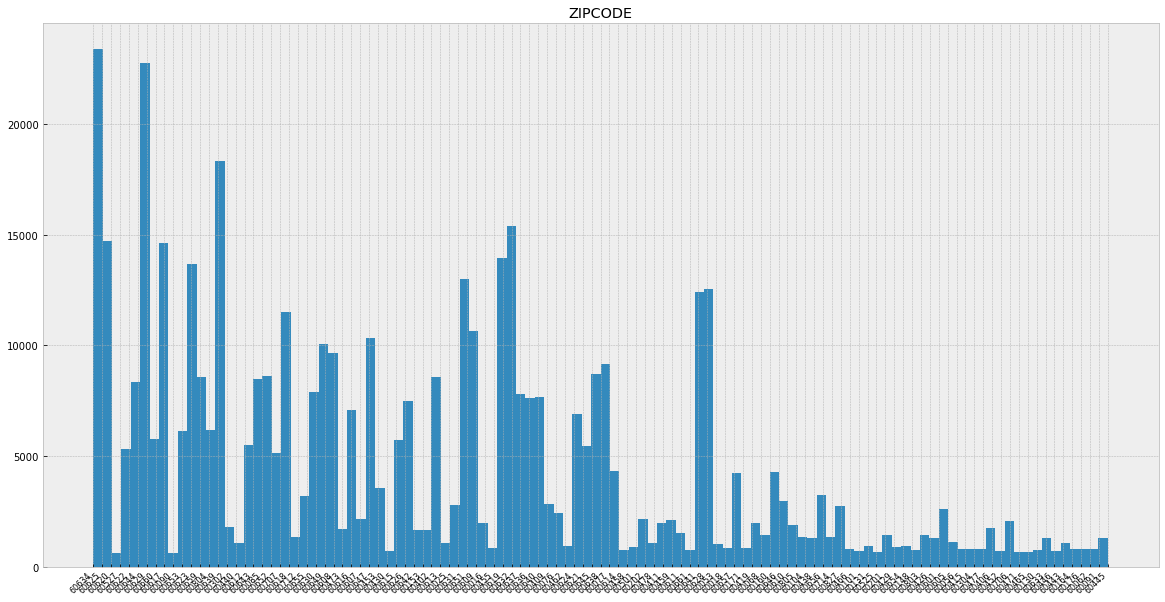

In [45]:
df['ZIPCODE'].hist(bins='auto', xlabelsize=8, figsize=[20,10])
plt.xticks(rotation=45, ha='right')
plt.title("ZIPCODE")
plt.show();

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492777 entries, 0 to 918966
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   CRASH_DATE    492777 non-null  object  
 1   DAMAGE        492777 non-null  category
 2   ZIPCODE       492777 non-null  object  
 3   SEX           492777 non-null  object  
 4   AGE           492777 non-null  int64   
 5   MAKE          492777 non-null  object  
 6   MODEL         492777 non-null  object  
 7   VEHICLE_YEAR  492777 non-null  int64   
dtypes: category(1), int64(2), object(5)
memory usage: 30.5+ MB


#### 4. SEX
Drop 'SEX' = 'X' and convert the dtype to 'category' for smaller data size

In [47]:
df['SEX'].value_counts(normalize=True)

M    0.567269
F    0.431879
X    0.000852
Name: SEX, dtype: float64

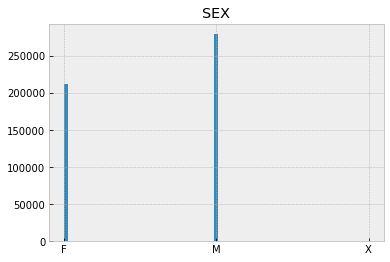

In [48]:
df['SEX'].hist(bins='auto')
plt.title("SEX")
plt.show()

In [49]:
df.drop(df[df['SEX'] == 'X'].index, inplace = True)

In [50]:
df['SEX'].value_counts()

M    279537
F    212820
Name: SEX, dtype: int64

In [51]:
df.memory_usage(deep=True)

Index            3938856
CRASH_DATE      38896203
DAMAGE            492668
ZIPCODE         30537570
SEX             30526134
AGE              3938856
MAKE            32236000
MODEL           32217517
VEHICLE_YEAR     3938856
dtype: int64

In [52]:
df['SEX']= df['SEX'].astype('category')

In [53]:
df.memory_usage(deep=True)

Index            3938856
CRASH_DATE      38896203
DAMAGE            492668
ZIPCODE         30537570
SEX               492561
AGE              3938856
MAKE            32236000
MODEL           32217517
VEHICLE_YEAR     3938856
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492357 entries, 0 to 918966
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   CRASH_DATE    492357 non-null  object  
 1   DAMAGE        492357 non-null  category
 2   ZIPCODE       492357 non-null  object  
 3   SEX           492357 non-null  category
 4   AGE           492357 non-null  int64   
 5   MAKE          492357 non-null  object  
 6   MODEL         492357 non-null  object  
 7   VEHICLE_YEAR  492357 non-null  int64   
dtypes: category(2), int64(2), object(4)
memory usage: 27.2+ MB


#### 5. AGE
Select 'AGE' between 16 and 80

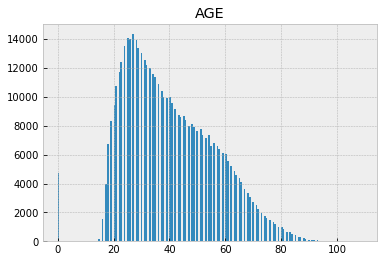

In [55]:
df['AGE'].hist(bins='auto')
plt.title("AGE")
plt.show()

In [56]:
df = df[(df.AGE >= 16) & (df.AGE <= 80)]

In [57]:
df['AGE'].value_counts()

27    14340
25    14056
26    14030
28    13952
24    13496
      ...  
76     1467
77     1318
78     1216
79     1020
80      995
Name: AGE, Length: 65, dtype: int64

<AxesSubplot:>

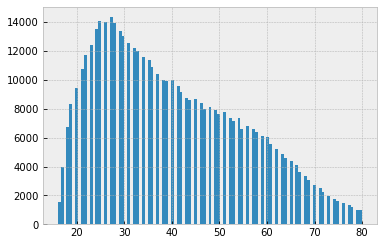

In [58]:
df['AGE'].hist(bins='auto')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482617 entries, 0 to 918966
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   CRASH_DATE    482617 non-null  object  
 1   DAMAGE        482617 non-null  category
 2   ZIPCODE       482617 non-null  object  
 3   SEX           482617 non-null  category
 4   AGE           482617 non-null  int64   
 5   MAKE          482617 non-null  object  
 6   MODEL         482617 non-null  object  
 7   VEHICLE_YEAR  482617 non-null  int64   
dtypes: category(2), int64(2), object(4)
memory usage: 26.7+ MB


#### 6. MAKE
Trim the long tails and outliers: drop 'MAKE' if its value_counts is less than 50.

In [64]:
df['MAKE'].value_counts()

CHEVROLET                                        62204
NISSAN                                           48156
HONDA                                            45777
FORD                                             42461
TOYOTA MOTOR COMPANY, LTD.                       38096
                                                 ...  
JOURNEY MOTOR HOMES, INC., ELKHART, IN               1
MYCO INDUSTRIES                                      1
CYCLE-MATE (MANUFACTURED BY T & T INDUSTRIES)        1
PETER PIRSCH & SONS CO., KENOSHA, WI                 1
AMERICAN BODY & TRAILER COMPANY                      1
Name: MAKE, Length: 269, dtype: int64

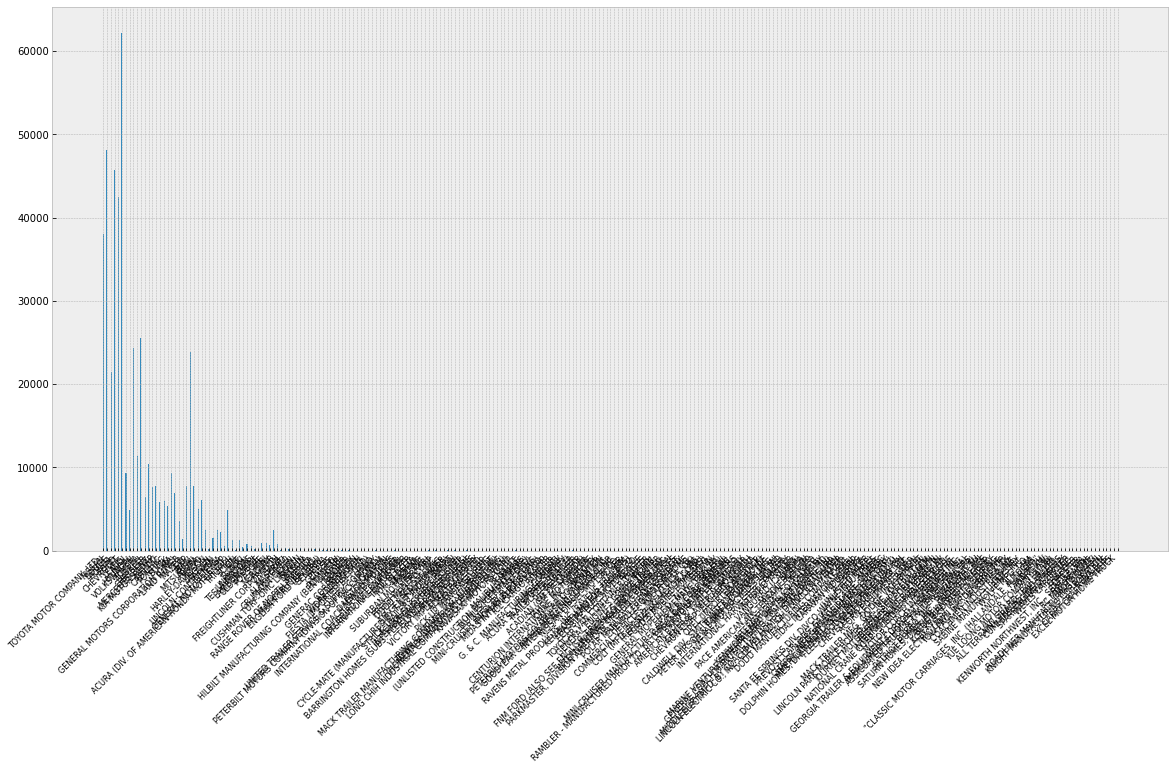

In [65]:
df['MAKE'].hist(bins='auto', xlabelsize=8, figsize=[20,10])
plt.xticks(rotation=45, ha='right')
plt.show();

In [67]:
make_count = df['MAKE'].value_counts()
make_dict = make_count.to_dict()

make_drop_list= []

for k in make_dict:
    if make_dict[k] < 50:
        make_drop_list.append(k)

df = df[df.MAKE.isin(make_drop_list) == False]

In [68]:
len(df['MAKE'].value_counts())

60

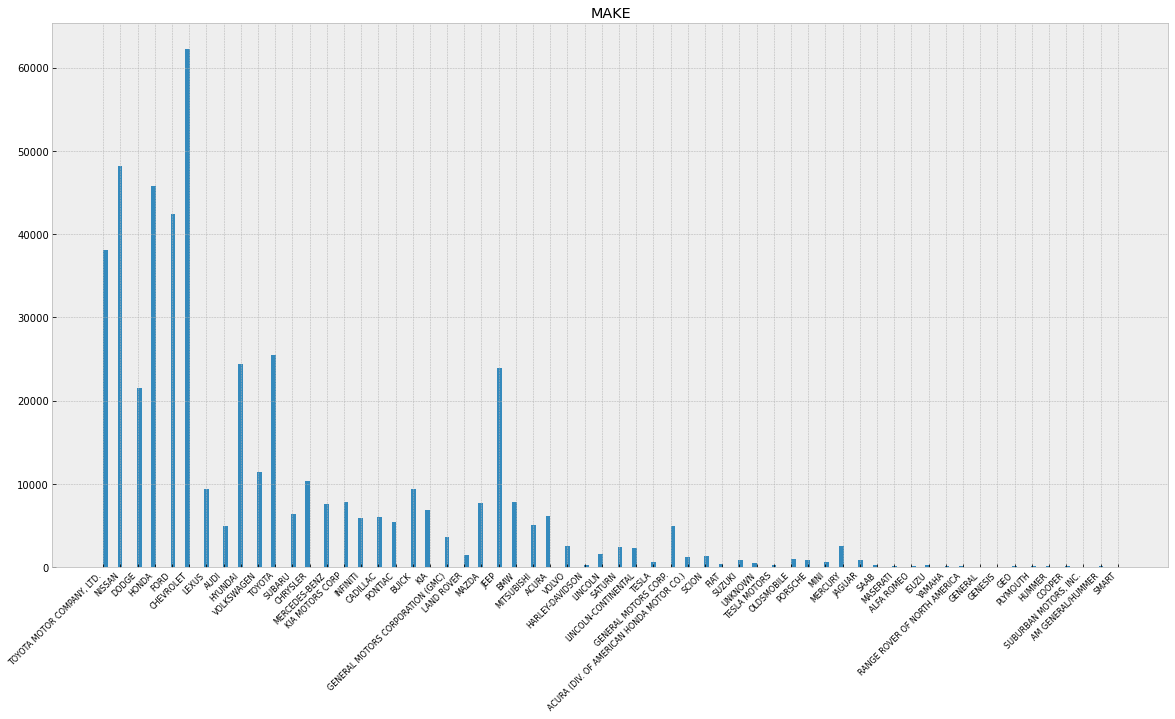

In [69]:
df['MAKE'].hist(bins='auto', xlabelsize=8, figsize=[20,10])
plt.xticks(rotation=45, ha='right')
plt.title('MAKE')
plt.show();

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481650 entries, 0 to 918966
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   CRASH_DATE    481650 non-null  object  
 1   DAMAGE        481650 non-null  category
 2   ZIPCODE       481650 non-null  object  
 3   SEX           481650 non-null  category
 4   AGE           481650 non-null  int64   
 5   MAKE          481650 non-null  object  
 6   MODEL         481650 non-null  object  
 7   VEHICLE_YEAR  481650 non-null  int64   
dtypes: category(2), int64(2), object(4)
memory usage: 26.6+ MB


#### 7. MODEL
Trim the long tails and outliers: drop 'MODEL' if its value_counts is less than 100.

In [73]:
df['MODEL'].value_counts()

UNKNOWN                                     30222
CAMRY                                       17870
OTHER (EXPLAIN IN NARRATIVE)                14052
COROLLA                                     13136
CIVIC                                       12505
                                            ...  
TARGA                                           1
MAVERICK TRUCK                                  1
LYNX                                            1
200 Series                                      1
J-20 (for vehicle years 1989 to present)        1
Name: MODEL, Length: 1329, dtype: int64

In [75]:
# Drop 'UNKNOWN':
df.drop(df[df['MODEL'] == 'UNKNOWN'].index, inplace = True)

# Drop 'OTHER (EXPLAIN IN NARRATIVE)':
df.drop(df[df['MODEL'] == 'OTHER (EXPLAIN IN NARRATIVE)'].index, inplace = True)

In [76]:
df['MODEL'].value_counts()

CAMRY              17870
COROLLA            13136
CIVIC              12505
ACCORD             11260
IMPALA              8143
                   ...  
J-20                   1
COUNTRY CRUISER        1
TOPAZ                  1
CHARIOT                1
ARNA (SERIES)          1
Name: MODEL, Length: 1327, dtype: int64

In [77]:
model_count = df['MODEL'].value_counts()
model_dict = model_count.to_dict()

model_drop_list= []

for k in model_dict:
    if model_dict[k] < 100:
        model_drop_list.append(k)

df = df[df.MODEL.isin(model_drop_list) == False]

In [78]:
df['MODEL'].value_counts()

CAMRY                            17870
COROLLA                          13136
CIVIC                            12505
ACCORD                           11260
IMPALA                            8143
                                 ...  
ML320 (sport utility)              103
RABBIT                             102
SX4                                101
PRIZM (BEGIN MODEL YEAR 1998)      100
SEVILLE                            100
Name: MODEL, Length: 434, dtype: int64

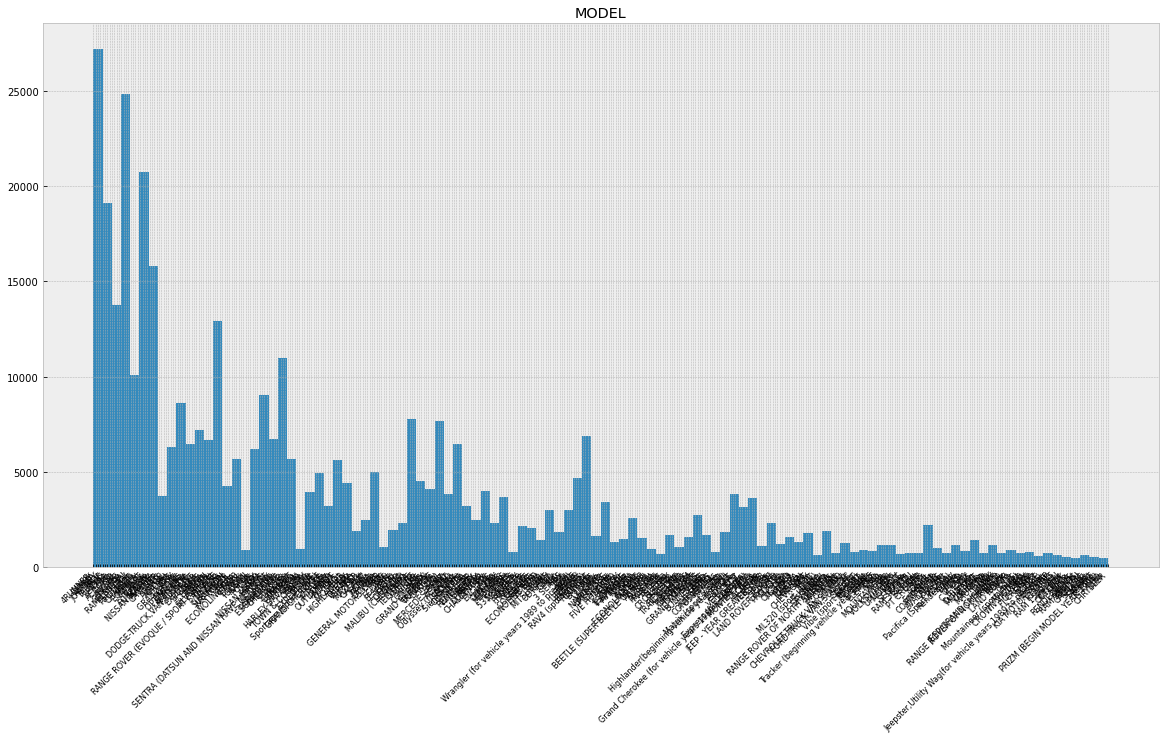

In [79]:
df['MODEL'].hist(bins='auto', xlabelsize=8, figsize=[20,10])
plt.xticks(rotation=45, ha='right')
plt.title('MODEL')
plt.show();

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419292 entries, 0 to 918966
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   CRASH_DATE    419292 non-null  object  
 1   DAMAGE        419292 non-null  category
 2   ZIPCODE       419292 non-null  object  
 3   SEX           419292 non-null  category
 4   AGE           419292 non-null  int64   
 5   MAKE          419292 non-null  object  
 6   MODEL         419292 non-null  object  
 7   VEHICLE_YEAR  419292 non-null  int64   
dtypes: category(2), int64(2), object(4)
memory usage: 23.2+ MB


#### 8. VEHICLE_YEAR
Looks like there are some entry errors. Select the 'VEHICLE_YEAR' range from 1900 to 2022.

In [83]:
df['VEHICLE_YEAR'].value_counts()

2015    31896
2016    29393
2014    27790
2017    27664
2013    26781
        ...  
2210        1
2918        1
1916        1
2201        1
2049        1
Name: VEHICLE_YEAR, Length: 127, dtype: int64

In [84]:
df = df[(df.VEHICLE_YEAR >= 1990) & (df.VEHICLE_YEAR <= 2022)]

In [85]:
df['VEHICLE_YEAR'].value_counts()

2015    31896
2016    29393
2014    27790
2017    27664
2013    26781
2012    23022
2007    21216
2008    20572
2011    20566
2018    20137
2006    18366
2010    18180
2005    16865
2009    15141
2019    14789
2004    14757
2003    12815
2002    10982
2020     8908
2001     8155
2000     6853
2021     5688
1999     4910
1998     3494
1997     2726
2022     2579
1996     1487
1995     1022
1994      650
1993      381
1992      250
1991      177
1990      118
Name: VEHICLE_YEAR, dtype: int64

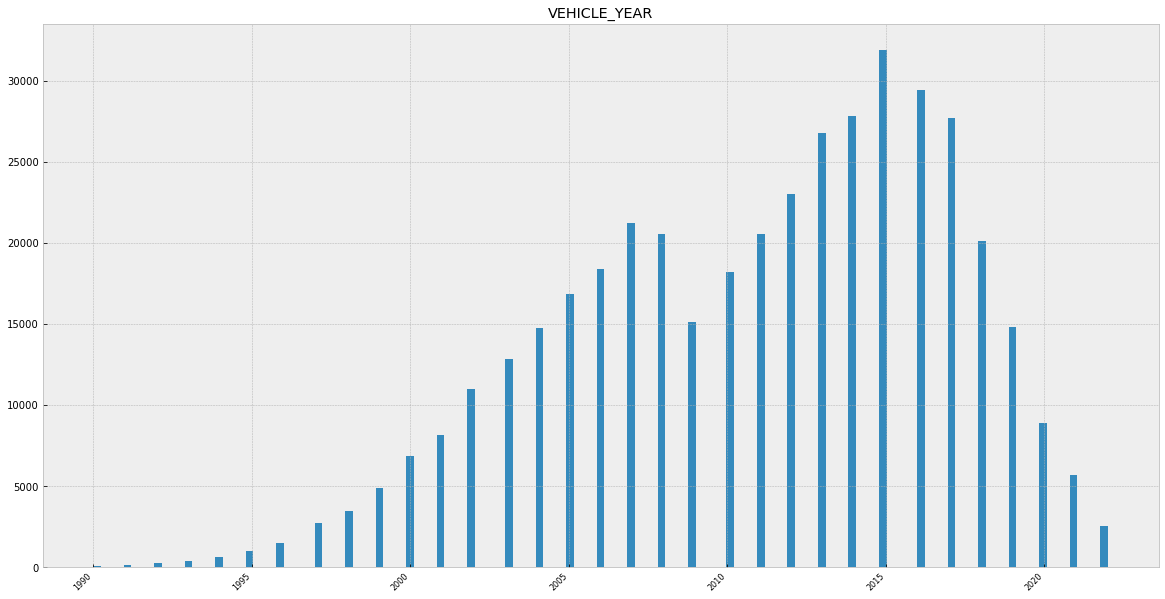

In [86]:
df['VEHICLE_YEAR'].hist(bins='auto', xlabelsize=8, figsize=[20,10])
plt.xticks(rotation=45, ha='right')
plt.title('VEHICLE_YEAR')
plt.show();

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418330 entries, 0 to 918966
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   CRASH_DATE    418330 non-null  object  
 1   DAMAGE        418330 non-null  category
 2   ZIPCODE       418330 non-null  object  
 3   SEX           418330 non-null  category
 4   AGE           418330 non-null  int64   
 5   MAKE          418330 non-null  object  
 6   MODEL         418330 non-null  object  
 7   VEHICLE_YEAR  418330 non-null  int64   
dtypes: category(2), int64(2), object(4)
memory usage: 23.1+ MB


## DONE! Save the cleaned DataFrame

In [92]:
df.to_csv('df_clean.csv')

# More Visualization

In [115]:
df_test = df.groupby(["SEX","DAMAGE"])['DAMAGE'].count()
df_test

SEX  DAMAGE       
F    $500 OR LESS      15712
     $501 - $1,500     52293
     OVER $1,500      113604
M    $500 OR LESS      19672
     $501 - $1,500     65012
     OVER $1,500      152037
Name: DAMAGE, dtype: int64

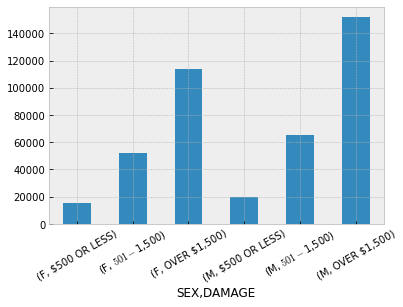

In [119]:
# # plot the result
df_test.plot(kind="bar")
plt.xticks(rotation=30)
plt.show();